<a href="https://colab.research.google.com/github/rafaekas/BigData/blob/main/Decesion_Tree_Drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np #mengimport modul NumPy
import pandas as pd #mengimport modul Pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt #mengimport modul matplotlib.pyplot
import seaborn as sns #mengimport modul Seaborn untuk visualisasi data statistik
from sklearn.tree import DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR #mengimpor kelas DecisionTreeClassifier DecisionTreeRegressor dari modul scikit-learn (sklearn), yang menyediakan algoritma pembelajaran mesin untuk klasifikasi dan regresi menggunakan decision tree.

In [ ]:
drugs = pd.read_csv('/content/drug200.csv') #mengimport dataset "drugs200.csv" yang ada di direktori
print(drugs.head()) #menampilkan lima baris pertama dari dataset menggunakan metode head() dari Pandas.

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


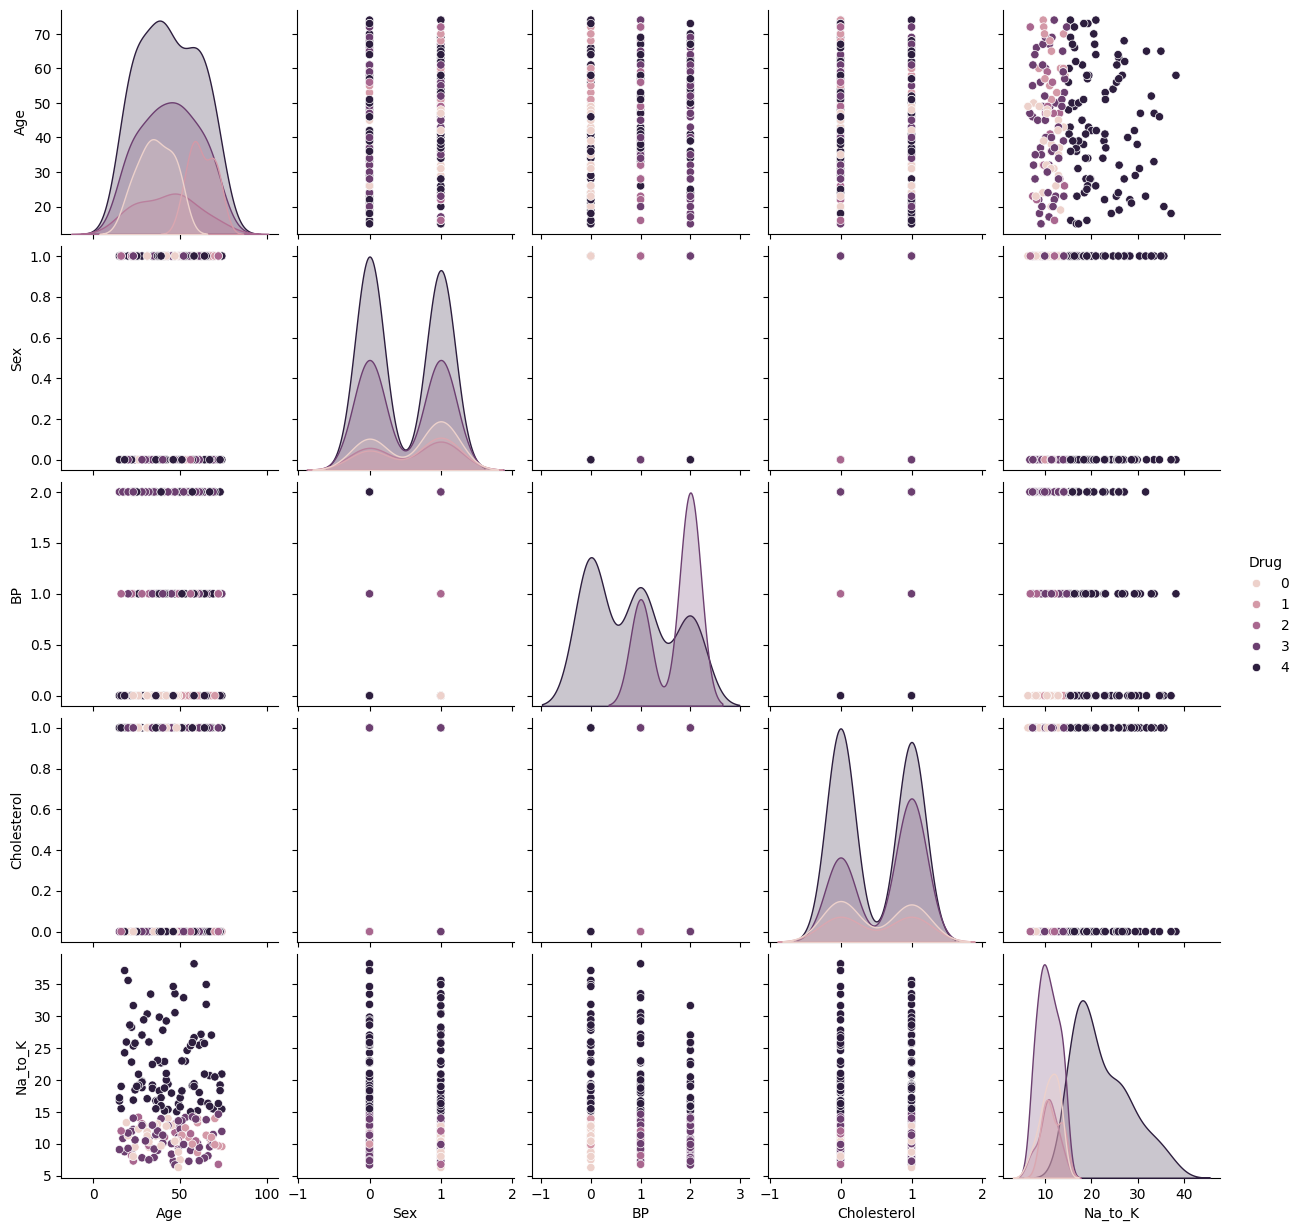

In [22]:
sns.pairplot(data=drugs, hue='Drug'); #membuat pairplot menggunakan Seaborn

In [ ]:
drugs.info() #memberikan informasi tentang dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
drugs.describe(include='O') #menghasilkan ringkasan statistik untuk kolom-kolom kategorikal dalam dataset

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


In [ ]:
#melakukan label encoding pada kolom-kolom kategorikal menggunakan 'LabelEncoder' dari scikit-learn
from sklearn.preprocessing import LabelEncoder #Mengimpor kelas 'LabelEncoder' dari modul 'sklearn.preprocessing'

label_enc = LabelEncoder() #Inisialisasi 'LabelEncoder'

cols = drugs.select_dtypes(include='O').columns #pilih kolom kategorikal dalam dataset

for col in cols: # looping setiap kolom dataset
    drugs[col] = label_enc.fit_transform(drugs[col]) #mengubah nilai kolom kategorikal menjadi numerik

drugs #menampilkan dataset yang telah diubah

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [ ]:
#membagi dataset drugs menjadi features (X) dan target (y)
X = drugs.drop(columns='Drug') #'X' sebagai features
y = drugs['Drug'] #'y' sebagai target

In [ ]:
display(X.head(3), y.head(3)) #menampilkan tiga baris pertama dari dataset features (X) dan target (y).

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114


0    4
1    2
2    2
Name: Drug, dtype: int64

In [ ]:
#membagi dataset menjadi data pelatihan (X_train, y_train) dan data uji (X_test, y_test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [ ]:
tree_clf0 = DTC() #membuat model Decision Tree Classifier
tree_clf0.fit(X_train,y_train) #melatih 'Decision Tree Classifier' dengan data pelatihan

DecisionTreeClassifier()

In [ ]:
tree_clf0.score(X_train, y_train) #menghitung akurasi data pelatihan.

1.0

In [ ]:
tree_clf0.score(X_test, y_test) #menghitung akurasi data uji

1.0

In [ ]:
#menghitung akurasi model menggunakan data uji yang diprediksi dan label sebenarnya
from sklearn.metrics import accuracy_score, classification_report
y_pred = tree_clf0.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [ ]:
#menghasilkan laporan klasifikasi untuk data uji dan menampilkan laporan klasifikasi
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



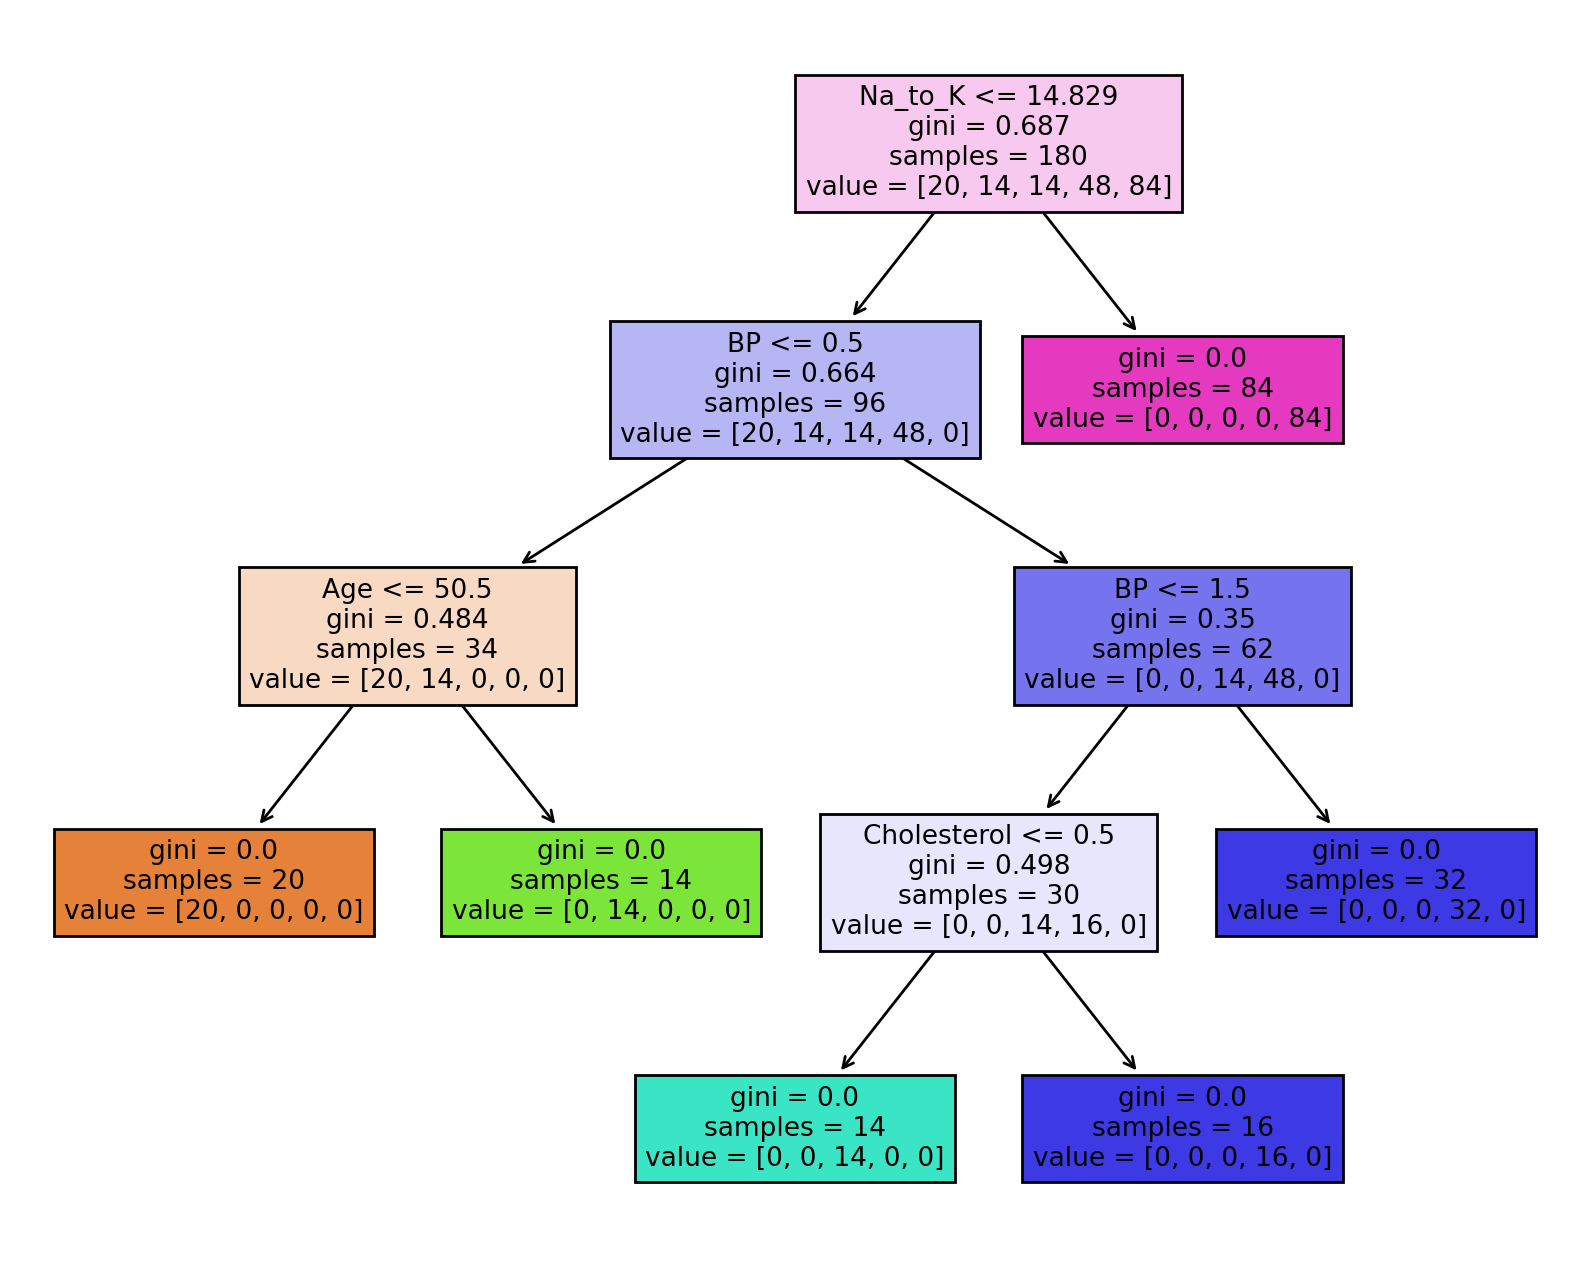

In [ ]:
#memvisualisasikan struktur decision tree yang telah dilatih
from sklearn.tree import plot_tree #mengimpor fungsi 'plot_tree' dari modul 'sklearn.tree'
plt.figure(figsize=(10, 8), dpi=200) #membuat gambar (figure)
plot_tree(tree_clf0, feature_names=drugs.columns, filled=True);